In [1]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

In [2]:
import pandas as pd
pd.set_option('max_columns', 50)

import altair as alt
alt.data_transformers.enable('json')

from dask.cache import Cache
cache = Cache(4e9) # 4gb cache
cache.register()

In [3]:
from lac.plot import plot_with_roads
from lac.transform import repairs_circles, repairs_with_crimes, is_day

[########################################] | 100% Completed | 17.8s


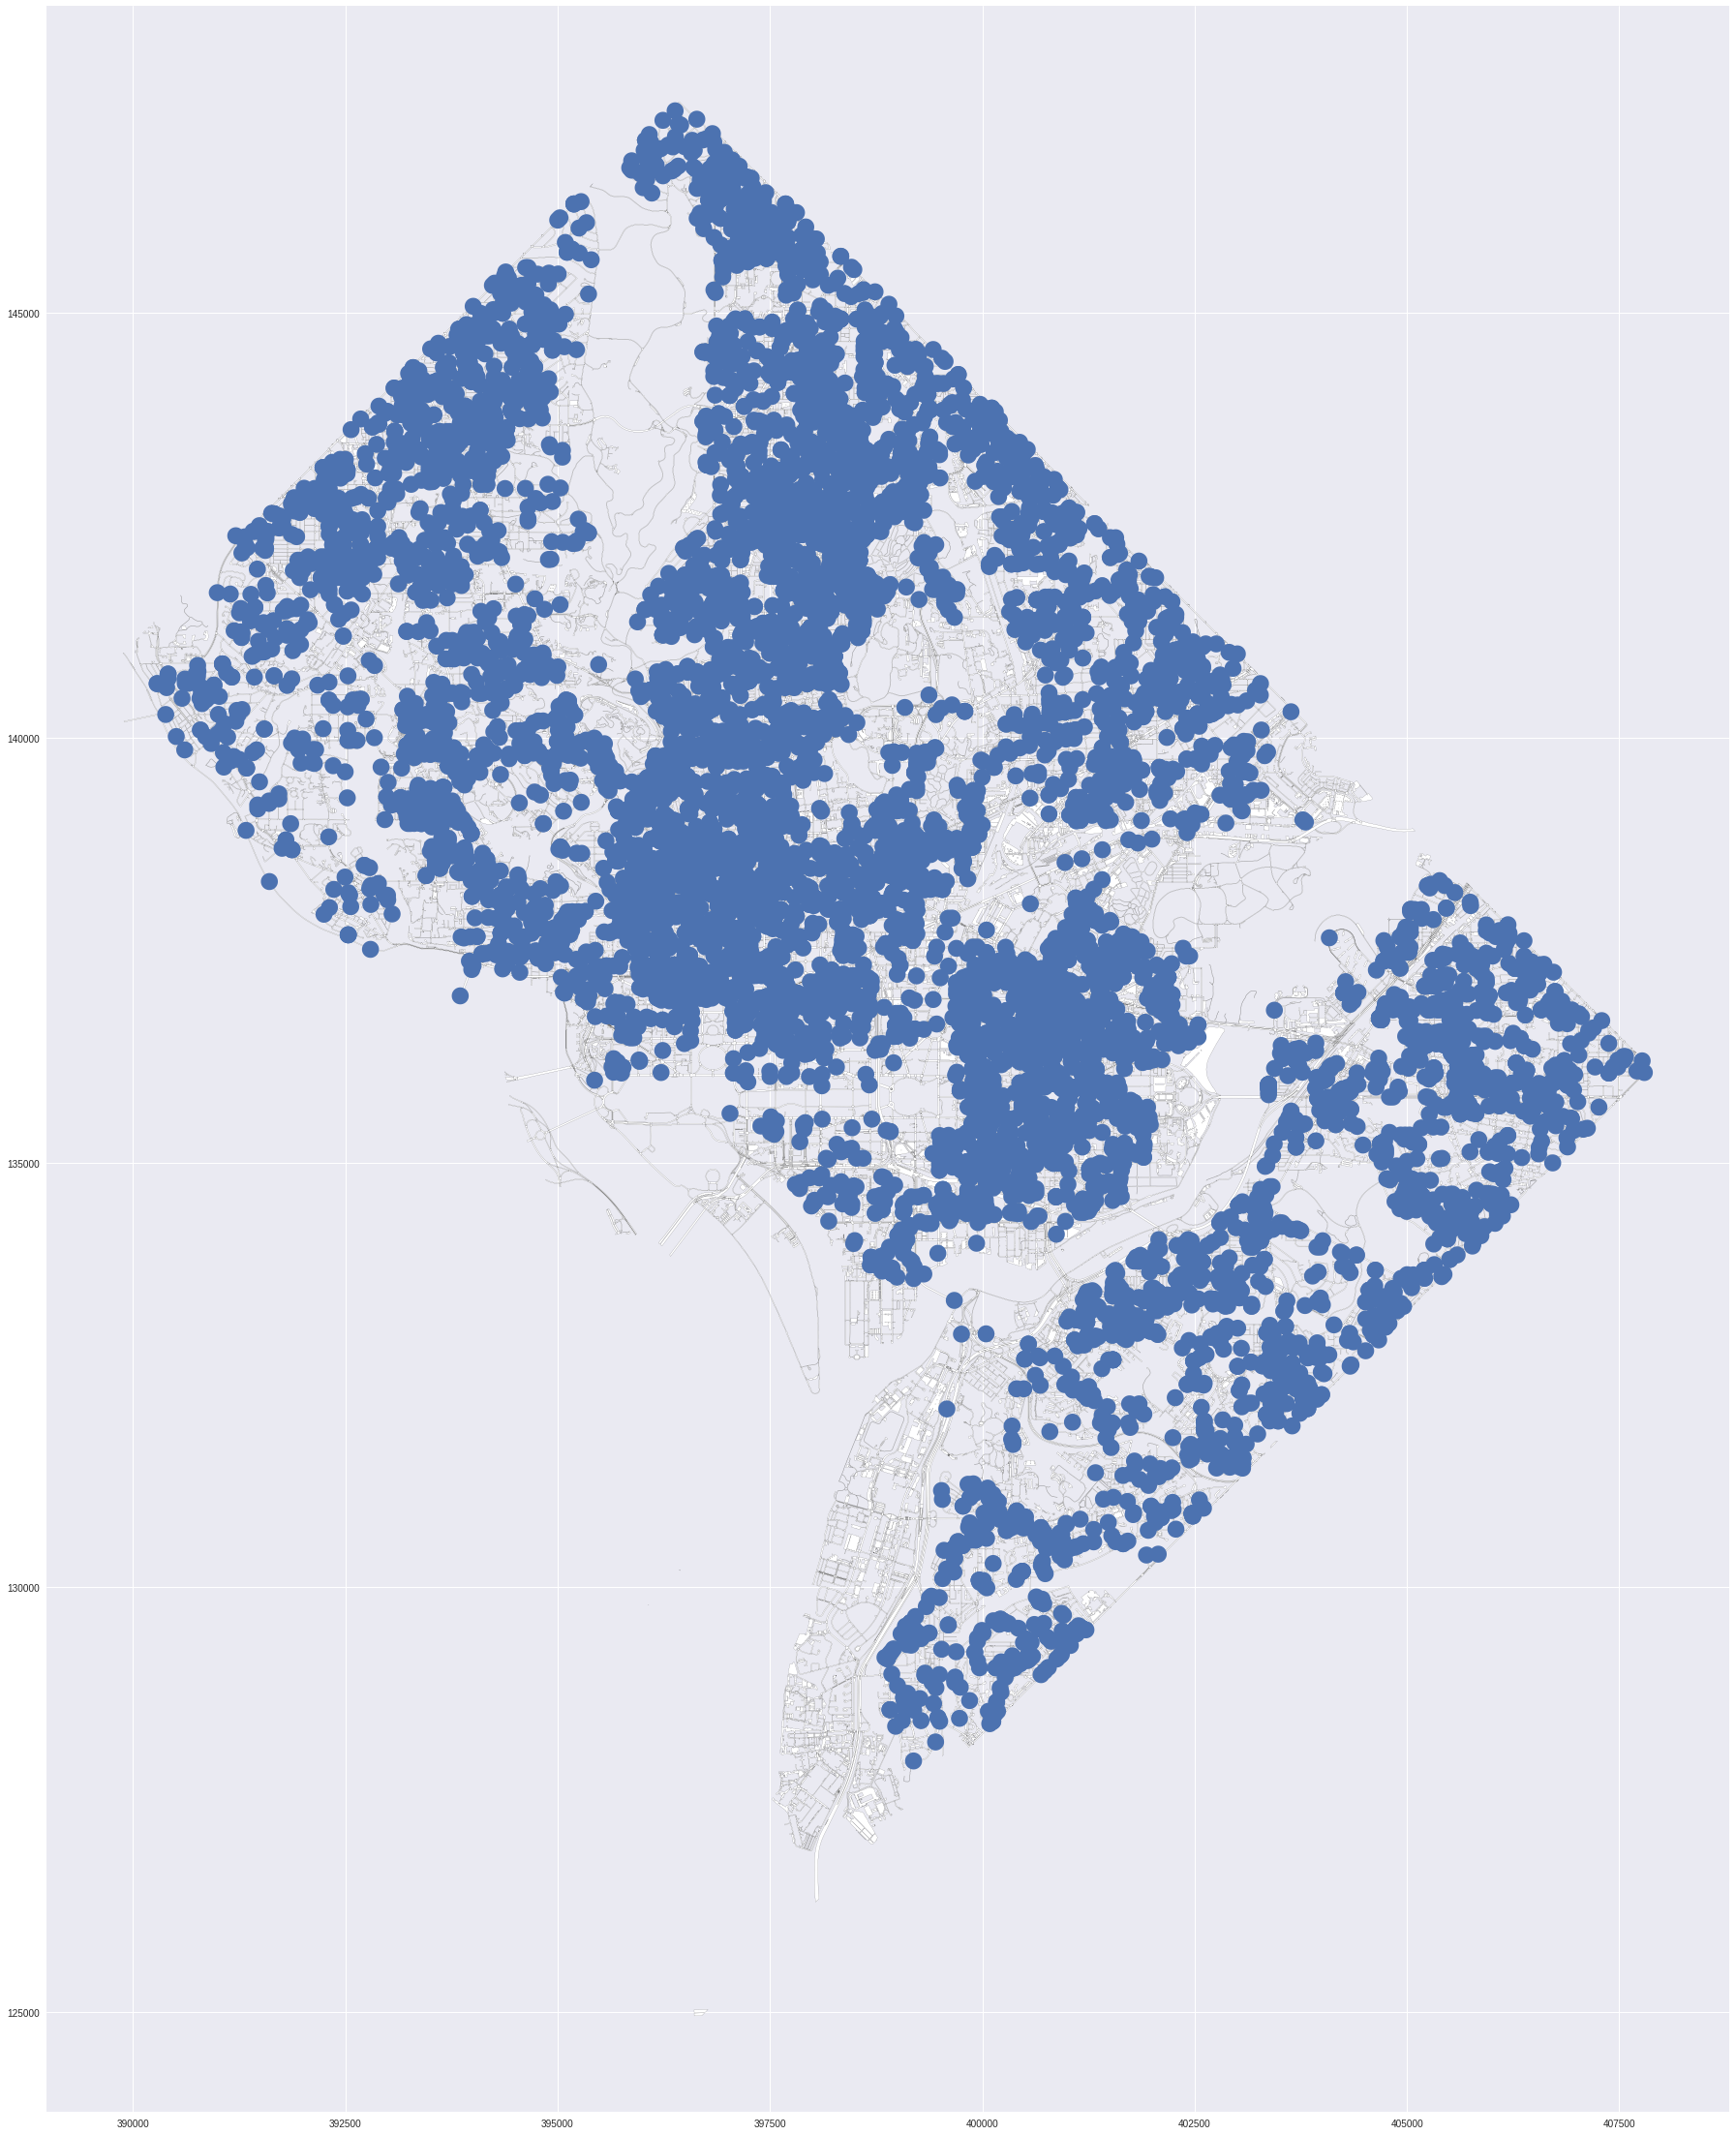

In [4]:
plot_with_roads(repairs_circles).compute()

In [5]:
repairs_with_crimes.info().compute()

[######                                  ] | 16% Completed |  3.8sWarning: CRS does not match!
[#################################       ] | 83% Completed | 55.7s<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1000435 entries, 0 to 9506
Data columns (total 33 columns):
description             1000435 non-null object
Applytoentity           1000435 non-null object
311 SR #                1000435 non-null object
Woxcoordinate           1000435 non-null float64
Woycoordinate           1000435 non-null float64
Day of Datewoclosed     1000435 non-null datetime64[ns]
geometry                1000435 non-null object
circles_geometry        1000435 non-null object
index_right             1000435 non-null float64
CCN                     1000435 non-null object
REPORT_DAT              1000435 non-null datetime64[ns]
SHIFT                   1000435 non-null object
METHOD                  1000435 non-null object
OFFENSE                 1000435 non-null object
BLOCK                   1000435 non

the `rel_days` is the time number of days between the streetlight being repaired and the crime that happened near it

In [8]:
alt.Chart(
    repairs_with_crimes[['rel_days', 'is_day']].compute(),
).mark_line().encode(
    x=alt.X(
        'rel_days:Q',
        scale=alt.Scale(domain=[-7, 7])
    ),
    y='count(*):Q',
    color='is_day'
).interactive()

[########################################] | 100% Completed |  0.1s


<VegaLite 2 object>